# Time Series Analysis for Climate Change Using Earth Surface Temperature Data

## 1. Project Background

Climate change is a crucial global concern that has significant impacts on ecosystems, weather patterns, and human societies. As temepratures rise, undertanding historical temperature trends becomes essential for informed decision-making.The objective of this project is to examine Earth Surface Temperature Data utilising time series methodologies to gain a deeper understanding of the dynamics of climate change.This study will focus on analysing Earth surface temperature measurements recorded over years to uncover underlying patterns and trends.

## 2. What is Time Series?

A time series is a sequence of data points collected at successive time intervals. It represents how a variable changes over time. For instance, when examining Earth's surface temperature, monthly measurements gathered over decades and visualised in a graph provide a clear illustration of a time series. This approach allows for detailed analysis and pattern recognition in understanding temperature trends and variations over extended periods.

## 3. What is ARIMA Model?

The ARIMA (AutoRegressive Integrated Moving Average) model is a form of regression analysis that checks the strength of one dependent variable relative to changing values. It consists of three main components:

**AutoRegressive (AR)**:  Examines how past values of a variable affect its current value by modeling the connection between an observation and its prior values to forecast the present value.

**Integrated (I)**: Involves differencing raw observations (e.g., subtracting an observation from the previous time step) to ensure the time series becomes stationary.

**Moving Average (MA)**: Uses the relationship between an observation and the error from a previous forecast to predict future values.

Parameters in ARIMA are denoted as (p, d, q):

**p (AutoRegressive Order)**: Captures how many past observations directly influence the current prediction.

**d (Differencing Order)**: Number of times the data is differenced to achieve stationarity, removing trends and seasonality.

**q (Moving Average Order)**: Size of the moving average window, accounting for the influence of past forecast errors.

Applying the ARIMA model to Earth Surface Temperature Data enables us to uncover underlying trends, seasonal patterns, and make informed predictions for the future. This approach enhances our understanding of climate change dynamics through statistical analysis.

## Importing the libraries

In [141]:
import pandas as pd
from datetime import datetime 
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import warnings

## Importing the dataset

In [142]:
# Load the dataset 
df = pd.read_csv('archive/GlobalLandTemperaturesByState.csv', header=0)

# Print the first few rows and data types
print(df.head())
print(df.dtypes)


           dt  AverageTemperature  AverageTemperatureUncertainty State Country
0  1855-05-01              25.544                          1.171  Acre  Brazil
1  1855-06-01              24.228                          1.103  Acre  Brazil
2  1855-07-01              24.371                          1.044  Acre  Brazil
3  1855-08-01              25.427                          1.073  Acre  Brazil
4  1855-09-01              25.675                          1.014  Acre  Brazil
dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object


### Exploring the dataset

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   AverageTemperature             620027 non-null  float64
 2   AverageTemperatureUncertainty  620027 non-null  float64
 3   State                          645675 non-null  object 
 4   Country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB


In [153]:
df.describe()

,Avg_temp,CI_temp,year
count,645675.000000,645675.000000,645675.000000
mean,8.953561,1.359053,1898.295178
std,13.708755,1.396283,69.907443
min,-45.389000,0.036000,1743.000000
25%,-0.666000,0.323000,1845.000000
50%,11.076000,0.713000,1902.000000
75%,19.809000,2.026000,1957.000000
max,36.339000,12.646000,2013.000000


In [221]:
# Check the range of your index
print("Index Range: ", resample_df.index.min(), " to ", resample_df.index.max())

# Example: set a valid start and end date within the range
valid_start_date = resample_df.index.min()
valid_end_date = resample_df.index.max()

# Predict using valid start and end dates
Fcast100 = results_AR1.predict(start=valid_start_date, end=valid_end_date)

Index Range:  1743-12-31 00:00:00  to  2013-12-31 00:00:00


In [144]:
# checking unique countries
unique_countries = df['Country'].unique()
num_unique_countries = len(unique_countries)

print(f'Number of unique countries: {num_unique_countries}')

Number of unique countries: 7


In [145]:
# checking unique cities
unique_states = df['State'].unique()
num_unique_states = len(unique_states)

print(f'Number of unique cities: {num_unique_states}')

Number of unique cities: 241


## Data Preprocessing

### Taking care of missing data

In [146]:
print(df.isnull().sum())

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64


In [147]:
# Interpolate missing values in AverageTemperature
df['AverageTemperature'] = df['AverageTemperature'].interpolate(method='linear')
df['AverageTemperature'].ffill(inplace=True)
df['AverageTemperature'].bfill(inplace=True)

# Interpolate missing values in AverageTemperatureUncertainty
df['AverageTemperatureUncertainty'] = df['AverageTemperatureUncertainty'].interpolate(method='linear')
df['AverageTemperatureUncertainty'].ffill(inplace=True)
df['AverageTemperatureUncertainty'].bfill(inplace=True)

# Verify no missing values remain
print(df.isnull().sum())

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
State                            0
Country                          0
dtype: int64


### Taking care of duplicate rows

In [148]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print the result
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found.")

No duplicate rows found.


### Data Renaming

In [149]:
df.rename(columns={'dt' : 'Date','AverageTemperature': 'Avg_temp', 'AverageTemperatureUncertainty': 'CI_temp'},inplace=True)
df.head()

,Date,Avg_temp,CI_temp,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


### Handling Data Types

In [150]:
#Converting 'Date column' into 'Datetime datatype'
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace = True)
df.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='Date', length=645675, freq=None)

#### To effectively utilise the ARIMA model, several transformations are necessary. First, the data must be converted to a Pandas Series. Then, the date and time should be set as the index. The timestamps need to be in an immutable tuple format because iterating through tuple elements is faster than through a list. This process results in a series object with immutable timestamps.

### Final Dataset

In [161]:
#Now we use year as index
df['year']= df.index.year
df['month'] = df.index.month
df.head()

,Avg_temp,CI_temp,State,Country,year,month
Date,,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855,5
1855-06-01,24.228,1.103,Acre,Brazil,1855,6
1855-07-01,24.371,1.044,Acre,Brazil,1855,7
1855-08-01,25.427,1.073,Acre,Brazil,1855,8
1855-09-01,25.675,1.014,Acre,Brazil,1855,9


## Exploratory Data Analysis

In [162]:
#Grouping available data based on average temperature
df[['Country','Avg_temp']].groupby(['Country']).mean().sort_values('Avg_temp')


,Avg_temp
Country,
Canada,-0.850658
Russia,1.705690
United States,10.670634
China,11.076285
Australia,17.748491
India,22.093047
Brazil,23.862177


## Visualising the Surface Temperature by year

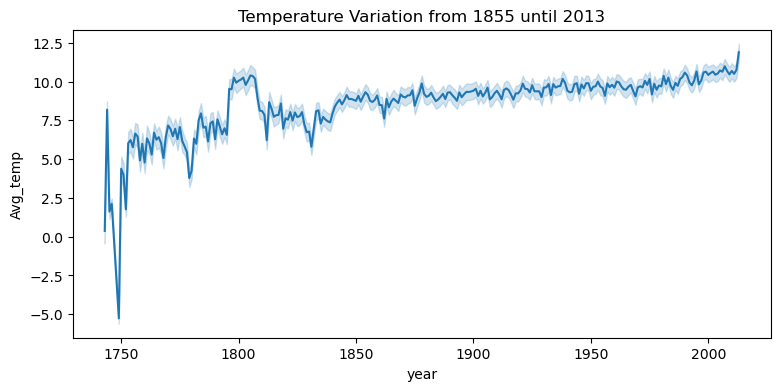

In [175]:
#Plotting graph between year and average temperature
# Each point on the line represents the average temperature for a specific year.
plt.figure(figsize=(9,4))
sns.lineplot(x = "year" , y = "Avg_temp",data=df)
plt.title('Temperature Variation from 1855 until 2013')
plt.show()

#### There was a peak in 1800 which could been attributed by human activity as the industrial revolution began around 1760. From this time onwards, the temperature is increasing highlighting the importance of reducing emissions and having initiatives to reduce the impact of global warming.

### # Visualising the Surface Temperature by Month

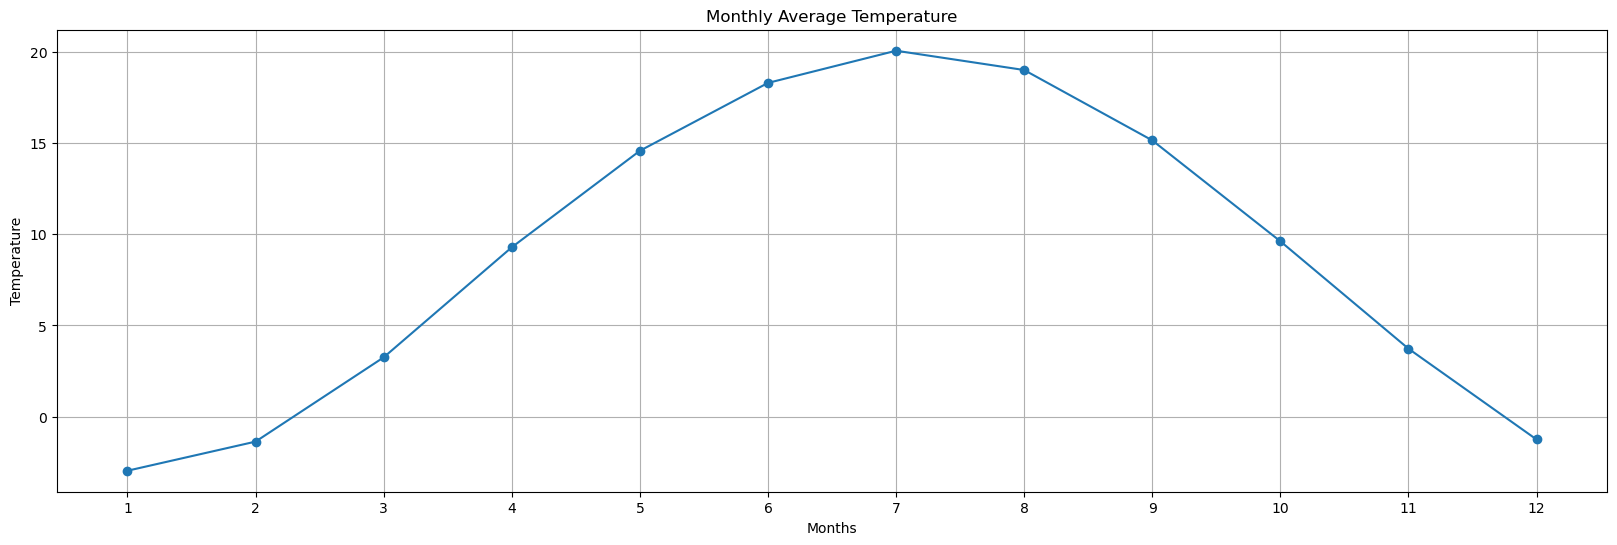

In [174]:
# Pivot all months into just one line and taking the average temeprature per month
pivot = df.pivot_table(index='month', values='Avg_temp', aggfunc='mean')

# Plotting
plt.figure(figsize=(20, 6))
plt.plot(pivot.index, pivot['Avg_temp'], marker='o', linestyle='-')
plt.title('Monthly Average Temperature')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks(range(1, 13))  
plt.grid(True)
plt.show()

#### From this graph, we can see that there us some seasonality, the higher temperatures are around May and September and the lower are between November and March. 

In [177]:
# Dropping unnecessary columns
resample_df = df[['Avg_temp']].resample('A').mean()
resample_df.head()

,Avg_temp
Date,
1743-12-31,0.365624
1744-12-31,8.191005
1745-12-31,1.612856
1746-12-31,2.112950
1747-12-31,-0.347319


In [184]:
# Checking date types
resample_df.dtypes

Avg_temp    float64
dtype: object

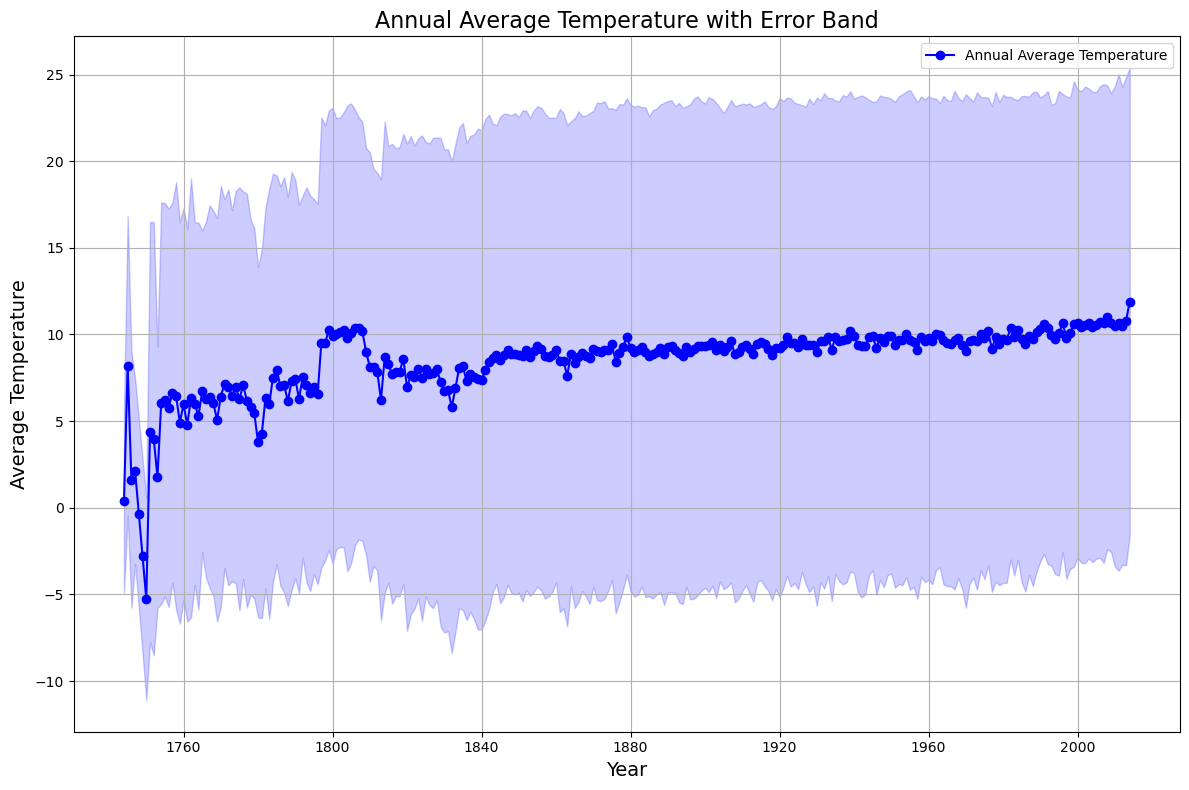

In [99]:
# Calculate standard deviation for error band
std_dev = df[['Avg_temp']].resample('A').std()

# Plotting line plot with shaded error band
plt.figure(figsize=(12, 8))
plt.plot(resample_df.index, resample_df['Avg_temp'], marker='o', color='b', label='Annual Average Temperature')
plt.fill_between(resample_df.index, (resample_df['Avg_temp'] - std_dev['Avg_temp']), (resample_df['Avg_temp'] + std_dev['Avg_temp']), color='b', alpha=0.2)
plt.title('Annual Average Temperature with Error Band', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Temperature', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### This graph shows the trend of average temperature over time, highlighting how much temperatures could vary each year, indicating high variability in temperature measurements.

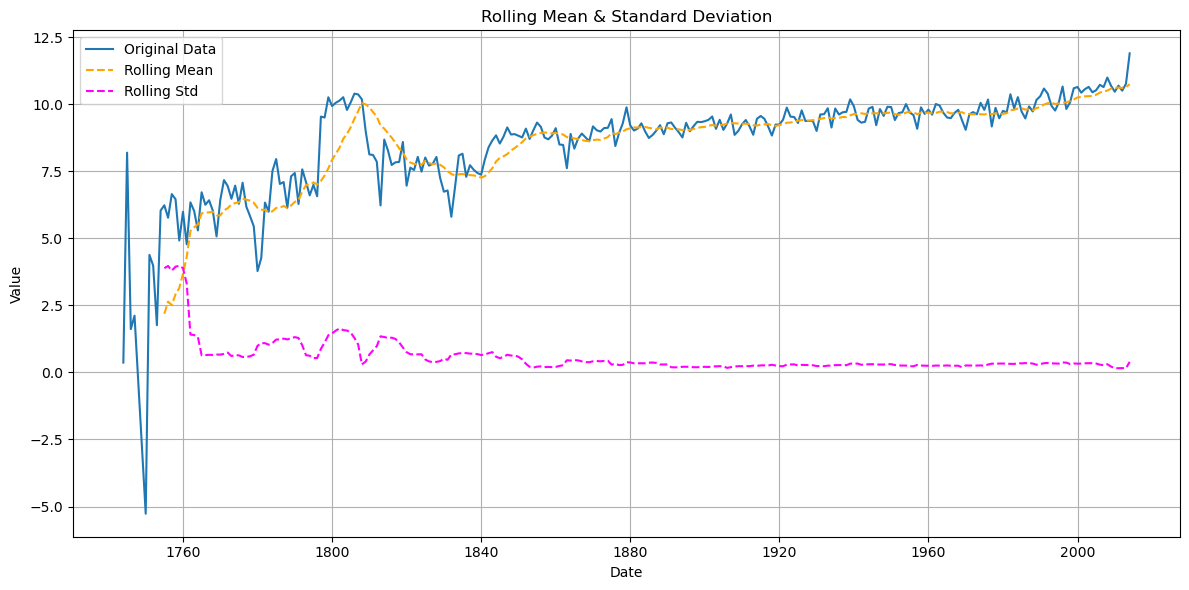

In [187]:
# Calculate rolling statistics
window_size = 12  # Adjust window size as needed
rolling_mean = resample_df.rolling(window=window_size, center=False).mean()
rolling_std = resample_df.rolling(window=window_size, center=False).std()

# Plotting
plt.figure(figsize=(12, 6))

# Plot original data
plt.plot(resample_df, label='Original Data')

# Plot rolling mean
plt.plot(rolling_mean, label='Rolling Mean', linestyle='--', color='orange')

# Plot rolling standard deviation
plt.plot(rolling_std, label='Rolling Std', linestyle='--', color='magenta')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Rolling Mean & Standard Deviation')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

#### This graph shows yearly temperature trends and how much they vary. The smooth line shows the average temperature over a set number of years (like a 3-year average). The rolling std is much lower than the rolling mean, meaning the data points are clustered around the average, with minimal year-to-year fluctuations in temperatures compared to the average trend.

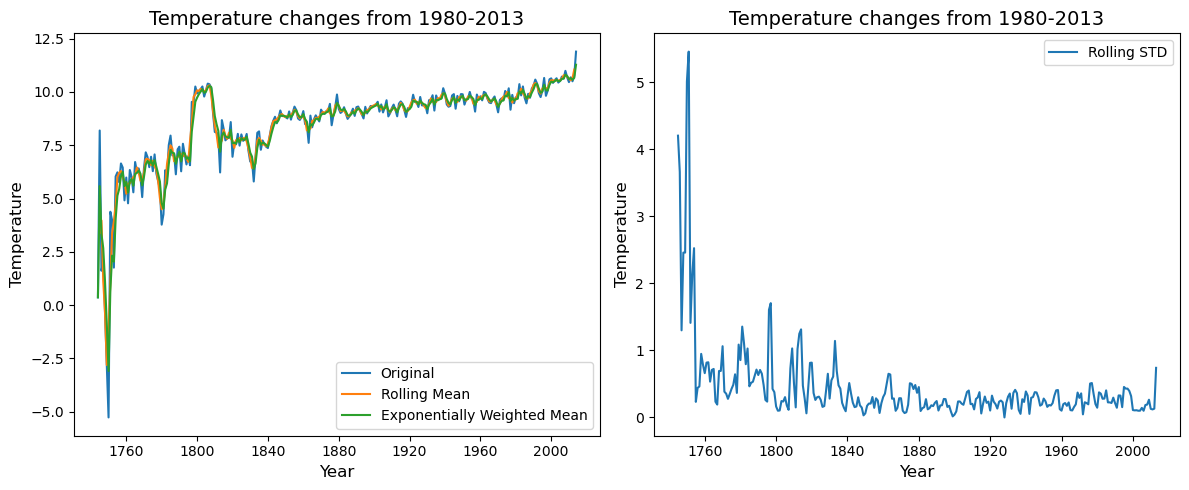

In [179]:
rol_mean = resample_df.rolling(window=3,center=True).mean()
ewm = resample_df.ewm(span=3).mean()
rol_std = resample_df.rolling(window=3,center=True).std()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

ax1.plot(resample_df,label='Original')
ax1.plot(rol_mean,label='Rolling Mean')
ax1.plot(ewm, label='Exponentially Weighted Mean')
ax1.set_title('Temperature changes from 1985-2013',fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

ax2.plot(rol_std,label='Rolling STD')
ax2.set_title('Temperature changes from 1985-2013',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

####  I plotted annual temperatures with smoothed trends (rolling mean & EWM) to reveal long-term changes. The rolling mean (3-year window) smooths out year-to-year variations, while the EWM emphasises recent trends. A separate plot shows rolling standard deviation, highlighting periods of higher year-to-year temperature variability. This combined visualisation helps understand temperature changes and variability from 1985 to 2013.

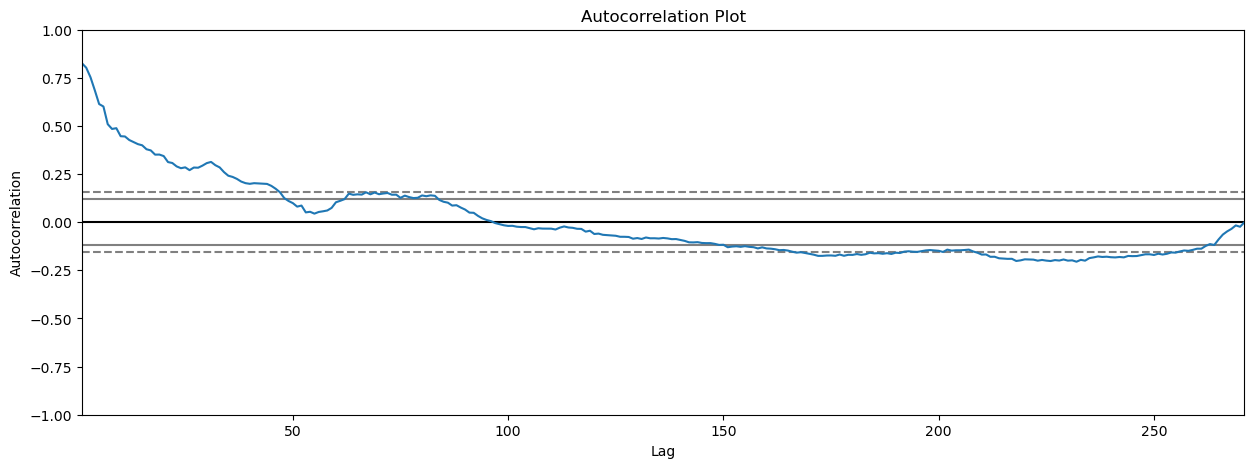

In [180]:
# Set the figure size (e.g., width=15, height=5)
plt.figure(figsize=(15, 5))

# Plot the autocorrelation
autocorrelation_plot(resample_df)

# Set the title and show the grid
plt.title('Autocorrelation Plot')
plt.grid()
plt.show()


#### This plot shows how annual temperaturescorrelate with themselves at different time lags. Since most of your line falls within this area, there's no clear pattern of temperatures being consistently higher or lower compared to temperatures at previous points in time.

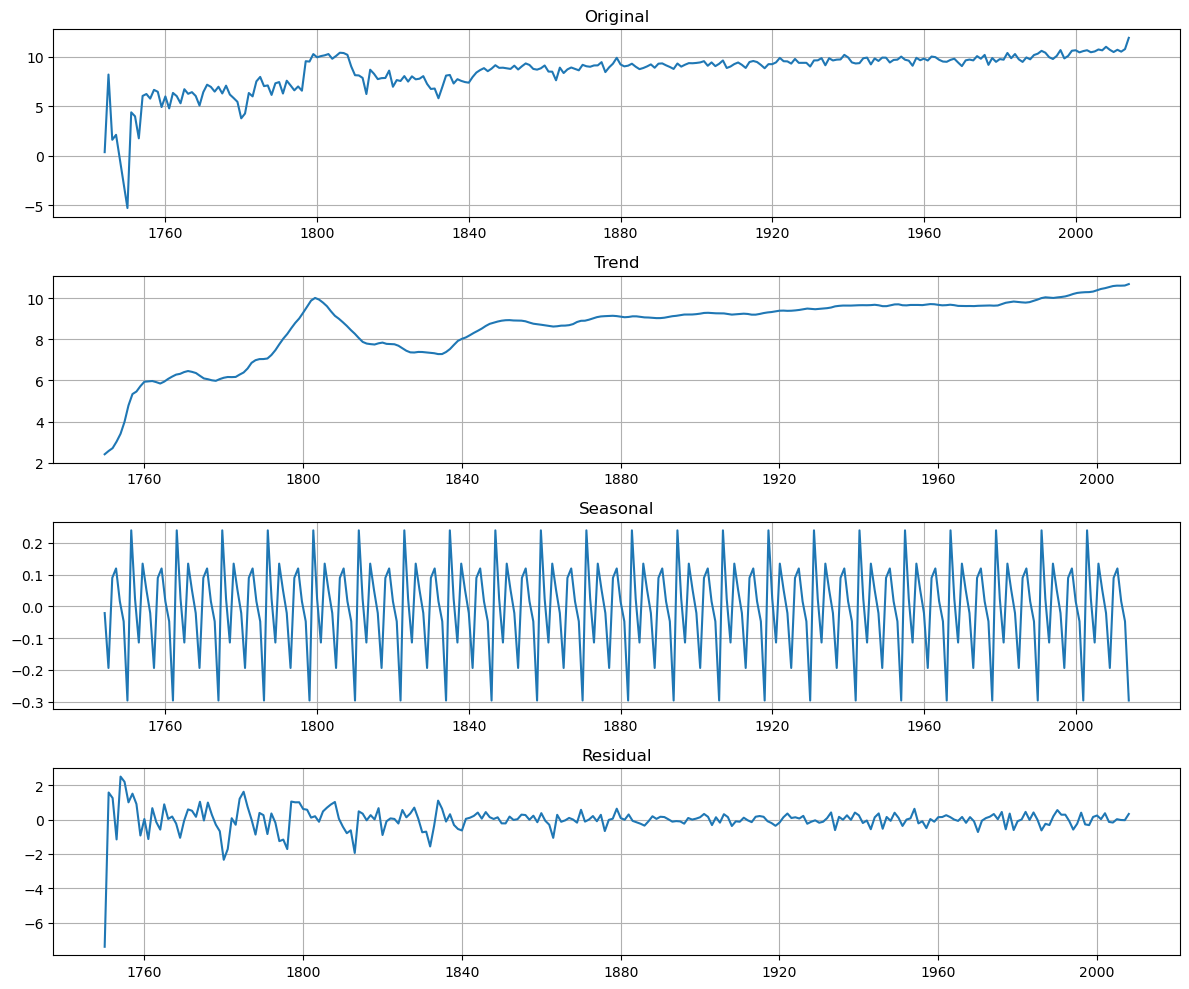

In [188]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


# Perform seasonal decomposition
decomp = seasonal_decompose(resample_df, period=12)  

# Extract decomposed components
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

# Plotting the decomposed components
plt.figure(figsize=(12, 10))

# Original data
plt.subplot(411)
plt.plot(resample_df)
plt.title('Original')
plt.xlabel('')
plt.grid(True)

# Trend component
plt.subplot(412)
plt.plot(trend)
plt.title('Trend')
plt.xlabel('')
plt.grid(True)

# Seasonal component
plt.subplot(413)
plt.plot(seasonal)
plt.title('Seasonal')
plt.xlabel('')
plt.grid(True)

# Residual component
plt.subplot(414)
plt.plot(residual)
plt.title('Residual')
plt.xlabel('')
plt.grid(True)

plt.tight_layout()
plt.show()

#### This graph shows that the trend and seasonality from the series have some pattern even the residual shows high variance in the early rather than the later years.

In [186]:
def stationarity_test(timeseries):
    import pandas as pd
    from statsmodels.tsa.stattools import adfuller

    print('Results of Dickey-Fuller Test:')
    df_test = adfuller(timeseries, autolag='AIC')
    df_output = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags', 'Number of Observations Used'])

    for key, value in Thisdf_test[4].items():
        df_output['Critical Value (%s)' % key] = value

    print(df_output)

    # Check if the series is stationary
    if df_test[0] < df_test[4]['5%']:
        print("The series is stationary.")
    else:
        print("The series is not stationary.")

# Run stationarity test on 'AverageTemperature'
stationarity_test(resample_df['Avg_temp'])


Results of Dickey-Fuller Test:
Test Statistic                  -2.902051
p-value                          0.045110
Number of Lags                  10.000000
Number of Observations Used    260.000000
Critical Value (1%)             -3.455754
Critical Value (5%)             -2.872721
Critical Value (10%)            -2.572728
dtype: float64
The series is stationary.


#### To create a time series forecast, the series must be stationary, meaning its mean and variance do not vary over time. To verify stationarity, I will perform the Fuller test. In this dataset, the test value is less than 0.05, confirming that the data is stationary.

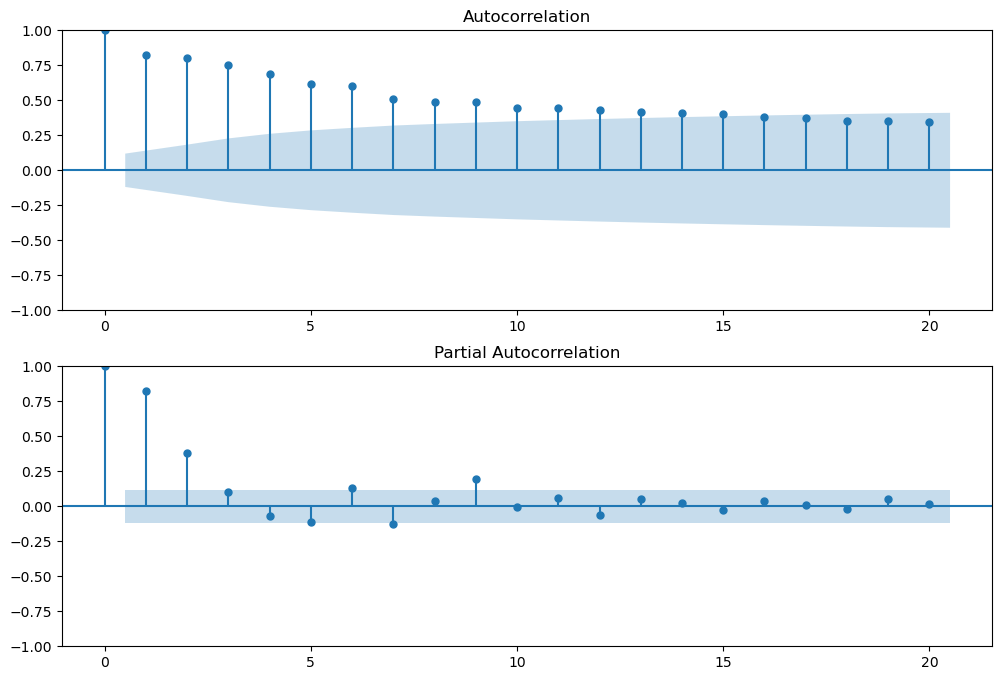

In [105]:
# Plot ACF and PACF
fig = plt.figure(figsize=(12, 8))

# Plot ACF
ax1 = fig.add_subplot(211)
plot_acf(resample_df, ax=ax1, lags=20)

# Plot PACF
ax2 = fig.add_subplot(212)
plot_pacf(resample_df, ax=ax2, lags=20)

plt.show()

#### Next, I will specify the order of autoregression lags 𝑝 p and the moving average 𝑞 q using PACF and ACF plots. The ACF plot shows the correlation between current temperatures and their lagged versions, while the PACF plot shows the correlation between current temperatures and their lagged versions, excluding the effects of earlier lags.

#### The autoregression for lags 1 and 9 is significant beyond the threshold, indicating notable differences at the beginning and end of the year compared to the previous month's spending. However, since there is a significant difference only at lag 2 in the second chart, I will start with a simple model and readjust if necessary.

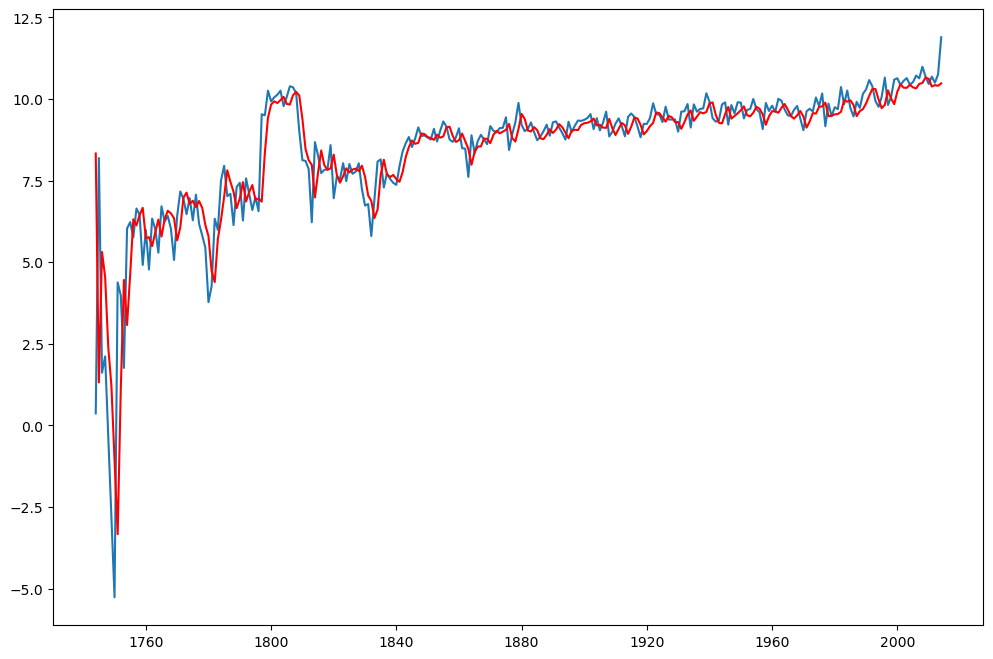

In [192]:
model = ARIMA(resample_df, order=(2,0,0))
results_AR2 = model.fit()
plt.figure(figsize=(12,8))
plt.plot(resample_df)
plt.plot(results_AR2.fittedvalues,color ='red')

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)


#### I implemented the ARIMA model using the appropriate function. The red line in the following graph represents the actual temperature values, while the blue line represents the model's predicted values. As evident from the graph, the predicted values closely resemble the actual data, suggesting a good model fit.

In [194]:
resample_df.tail()

,Avg_temp
Date,
2009-12-31,10.461537
2010-12-31,10.686661
2011-12-31,10.500732
2012-12-31,10.755588
2013-12-31,11.891855


In [195]:
results_AR2.fittedvalues.tail()

Date
2009-12-31    10.620436
2010-12-31    10.383677
2011-12-31    10.426138
2012-12-31    10.405995
2013-12-31    10.478896
Freq: A-DEC, dtype: float64

In [196]:
results_AR2.resid.tail()

Date
2009-12-31   -0.158899
2010-12-31    0.302984
2011-12-31    0.074594
2012-12-31    0.349593
2013-12-31    1.412959
Freq: A-DEC, dtype: float64

In [197]:
resample_df - results_AR2.fittedvalues.tail()

,2009-12-31 00:00:00,2010-12-31 00:00:00,2011-12-31 00:00:00,2012-12-31 00:00:00,2013-12-31 00:00:00,Avg_temp
Date,,,,,,
1743-12-31,NaN,NaN,NaN,NaN,NaN,NaN
1744-12-31,NaN,NaN,NaN,NaN,NaN,NaN
1745-12-31,NaN,NaN,NaN,NaN,NaN,NaN
1746-12-31,NaN,NaN,NaN,NaN,NaN,NaN
1747-12-31,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
np.mean(results_AR2.resid)

0.03691764270565749

In [207]:
results_AR2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Avg_temp   No. Observations:                  271
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -390.282
Date:                Fri, 21 Jun 2024   AIC                            788.564
Time:                        00:43:57   BIC                            802.972
Sample:                    12-31-1743   HQIC                           794.349
                         - 12-31-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3304      1.051      7.930      0.000       6.271      10.390
ar.L1          0.5554      0.021     26.092      0.000       0.514       0.597
ar.L2          0.3693      0.023     15.878      0.000       0.324       0.415
sigma2         1.0365      0.037     27.677      0.000       0.963       1.110
===================================================================================
Ljung-Box (L1) (Q):                   1.56   Jarque-Bera (JB):              4344.78
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               0.05   Skew:                             1.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

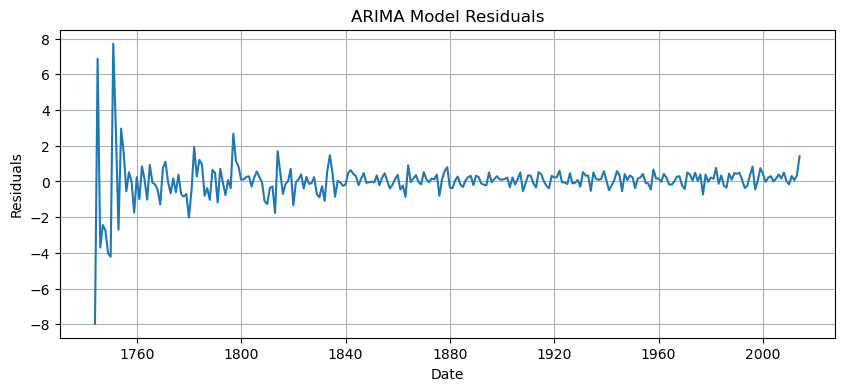

In [199]:
# Plot residuals
residuals = results_AR2.resid
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('ARIMA Model Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

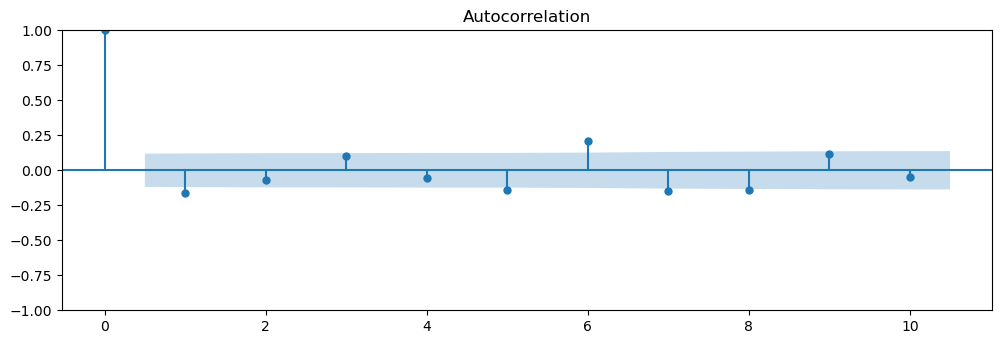

In [200]:
%matplotlib inline
fig= plt.figure(figsize =(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(results_AR2.resid, lags =10,ax=ax1)


In [201]:
def resid_histogram(data):
    import matplotlib.pyplot as plt
    from numpy import linspace
    from scipy.stats import norm
    
    plt.figure(figsize =(10,6))
    plt.hist(data,bins ='auto',density =True, rwidth =0.85,
            label ='Residuals')
    mean_resid,std_resid =norm.fit(data)
    xmin,xmax =plt.xlim()
    curve_length = linspace(xmin, xmax, 100)
    bell_curve =norm.pdf(curve_length,mean_resid,std_resid)
    plt.plot(curve_length,bell_curve,'m',linewidth =2)
    plt.grid(axis = 'y',alpha = 0.2)
    plt.xlabel('Residuals')
    plt.xlabel('Density')
    plt.title('Residuals vs Normal Distribution - Mean') 
    plt.show()
                                                                 

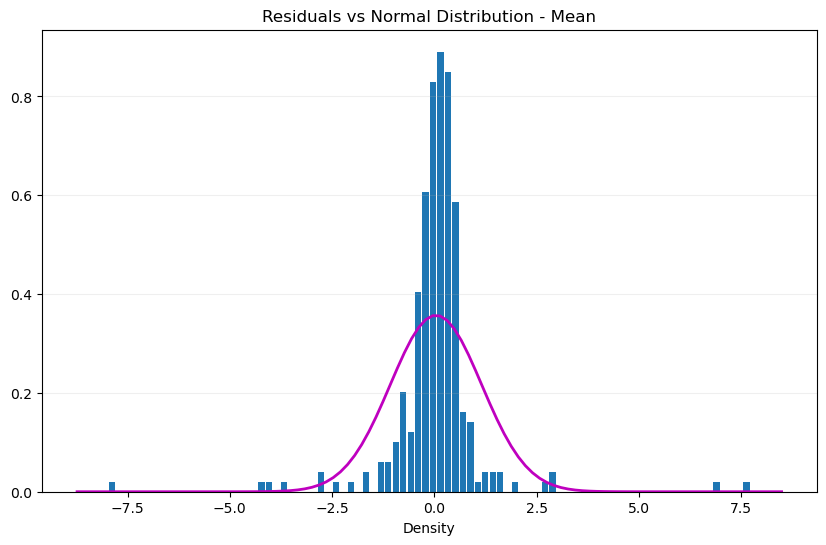

In [202]:
resid_histogram(results_AR2.resid)

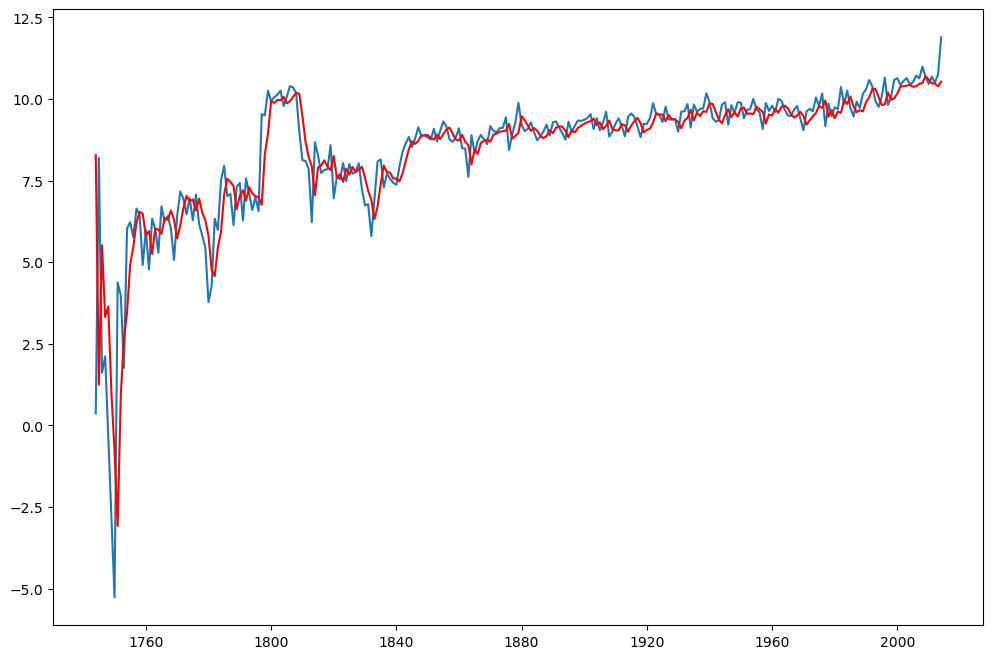

In [208]:
model = ARIMA(resample_df,order =(5,0,0))
results_AR5 = model.fit()
plt.figure(figsize=(12,8))
plt.plot(resample_df)
plt.plot(results_AR5.fittedvalues,color ='red')

import warnings
warnings.filterwarnings("ignore")


In [210]:
results_AR5.fittedvalues.tail()

Date
2009-12-31    10.601070
2010-12-31    10.480440
2011-12-31    10.475559
2012-12-31    10.387589
2013-12-31    10.532127
Freq: A-DEC, dtype: float64

In [211]:
results_AR5.resid.tail()

Date
2009-12-31   -0.139532
2010-12-31    0.206222
2011-12-31    0.025173
2012-12-31    0.367999
2013-12-31    1.359728
Freq: A-DEC, dtype: float64

In [212]:
resample_df - results_AR5.fittedvalues.tail()

,2009-12-31 00:00:00,2010-12-31 00:00:00,2011-12-31 00:00:00,2012-12-31 00:00:00,2013-12-31 00:00:00,Avg_temp
Date,,,,,,
1743-12-31,NaN,NaN,NaN,NaN,NaN,NaN
1744-12-31,NaN,NaN,NaN,NaN,NaN,NaN
1745-12-31,NaN,NaN,NaN,NaN,NaN,NaN
1746-12-31,NaN,NaN,NaN,NaN,NaN,NaN
1747-12-31,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
np.mean(results_AR5.resid)

0.042674877614162166

In [214]:
results_AR5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Avg_temp   No. Observations:                  271
Model:                 ARIMA(5, 0, 0)   Log Likelihood                -386.828
Date:                Fri, 21 Jun 2024   AIC                            787.657
Time:                        00:47:31   BIC                            812.872
Sample:                    12-31-1743   HQIC                           797.781
                         - 12-31-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2789      1.450      5.710      0.000       5.437      11.121
ar.L1          0.5261      0.022     23.537      0.000       0.482       0.570
ar.L2          0.2446      0.037      6.554      0.000       0.171       0.318
ar.L3          0.2048      0.039      5.218      0.000       0.128       0.282
ar.L4         -0.0213      0.028     -0.767      0.443      -0.076       0.033
ar.L5         -0.0165      0.028     -0.596      0.551      -0.071       0.038
sigma2         1.0099      0.036     28.052      0.000       0.939       1.080
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):              4422.06
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               0.05   Skew:                             1.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

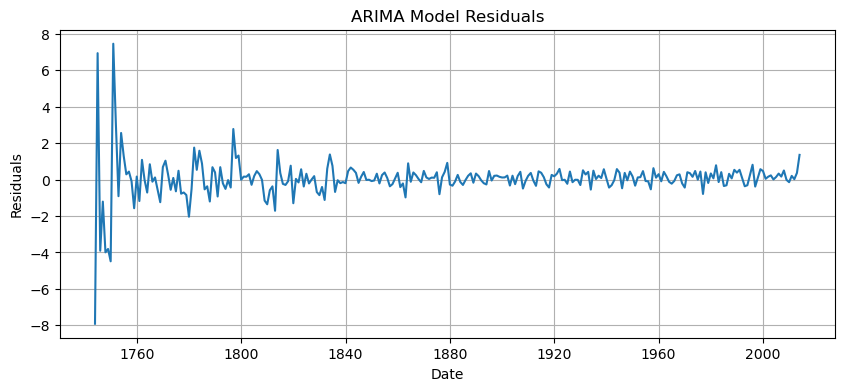

In [215]:
# Plot residuals
residuals = results_AR5.resid
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('ARIMA Model Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

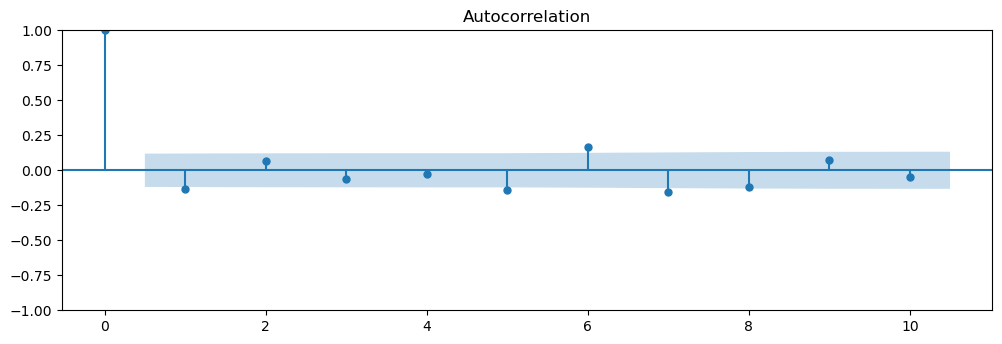

In [216]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(results_AR5.resid, lags =10, ax=ax1)

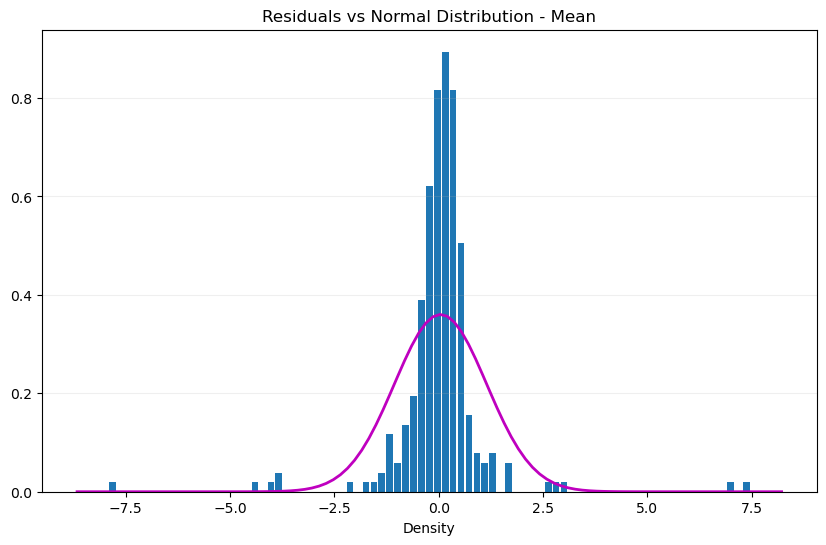

In [217]:
resid_histogram(results_AR5.resid)

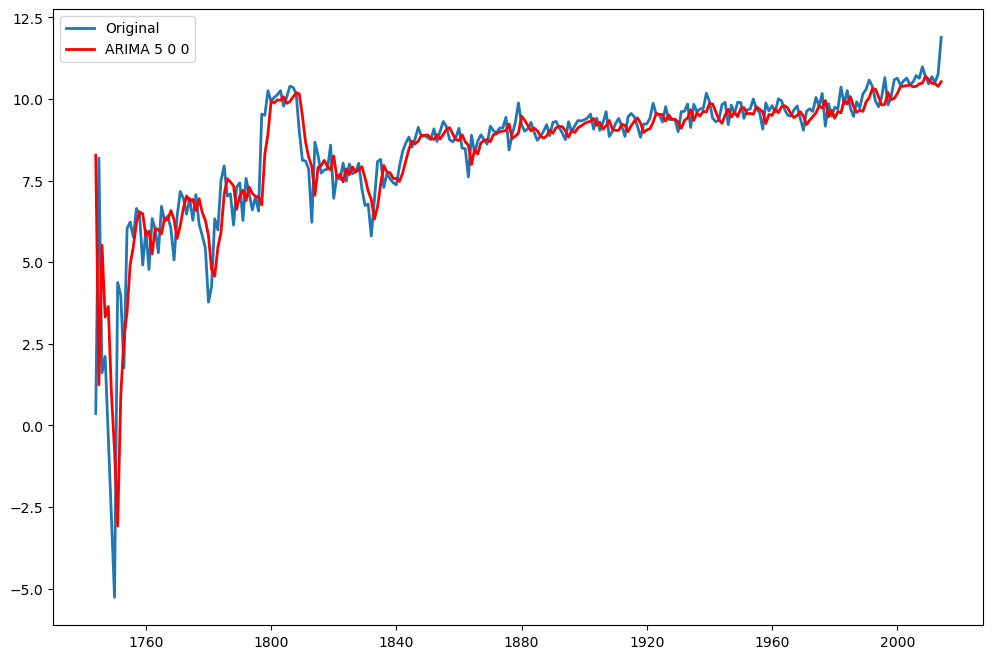

In [220]:
plt.figure(figsize =(12,8))
plt.plot(resample_df,linewidth =2, label = 'Original')
plt.plot(Fcast500,color ='red',linewidth =2,
        label ='ARIMA 5 0 0') 
plt.legend()

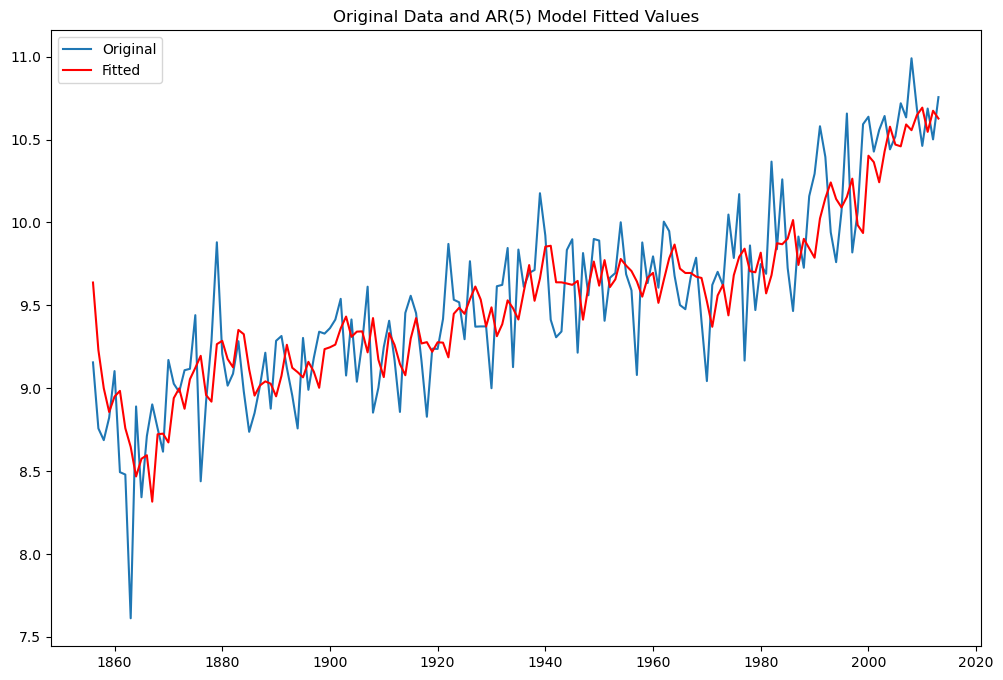

In [132]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assume resample_df is already loaded and indexed by Date

# Select a specific date range
start_date = '1855-05-01'
end_date = '2013-09-01'
dfts = resample_df[start_date:end_date]

# Check the type of dfts
if not isinstance(dfts, (pd.Series, pd.DataFrame)):
    raise ValueError("dfts should be a pandas Series or DataFrame")

# Ensure the index is a datetime index
if not isinstance(dfts.index, pd.DatetimeIndex):
    raise ValueError("The index of dfts should be a DatetimeIndex")

# If dfts is a DataFrame, select a specific column for the ARIMA model
if isinstance(dfts, pd.DataFrame):
    dfts = dfts['Avg_temp']  # Replace 'Avg_temp' with your actual column name

# Fit the ARIMA model
model = ARIMA(dfts, order=(5, 0, 0))
results_AR5 = model.fit()

# Plot the original data and the fitted values
plt.figure(figsize=(12, 8))
plt.plot(dfts, label='Original')
plt.plot(results_AR5.fittedvalues, color='red', label='Fitted')
plt.legend()
plt.title('Original Data and AR(5) Model Fitted Values')
plt.show()


In [133]:
# Forecasting example (if needed)
forecast_steps = 12  # Example: Forecasting 12 steps ahead
forecast = results_AR5.forecast(steps=forecast_steps)

# Print forecasted values
print(forecast)

2013-12-31    10.558652
2014-12-31    10.585631
2015-12-31    10.523719
2016-12-31    10.561624
2017-12-31    10.539086
2018-12-31    10.521285
2019-12-31    10.495303
2020-12-31    10.485632
2021-12-31    10.476066
2022-12-31    10.463091
2023-12-31    10.446863
2024-12-31    10.432399
Freq: A-DEC, Name: predicted_mean, dtype: float64


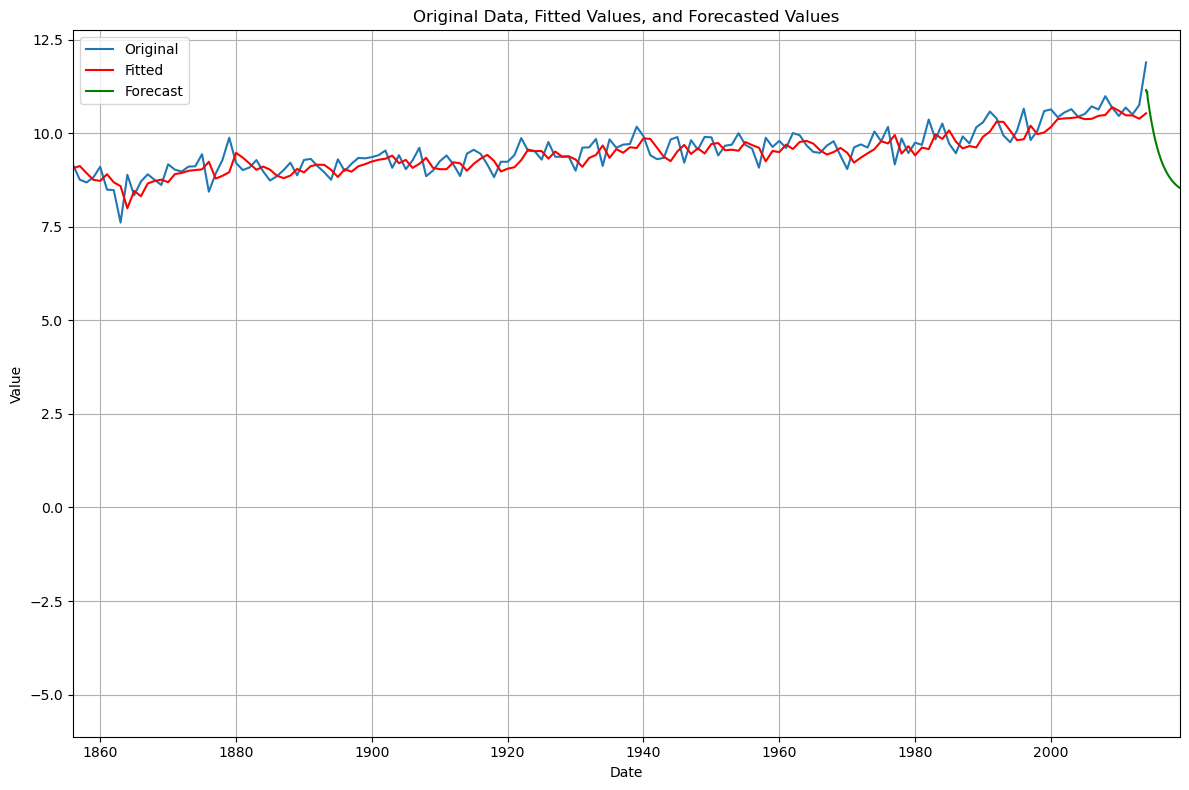

In [227]:
# Forecasting example (if needed)
forecast_steps = 60  # Forecasting 36 steps ahead (12 initial + 24 additional)
forecast = results_AR5.forecast(steps=forecast_steps)

# Plot the original data, fitted values, and forecasted values
plt.figure(figsize=(12, 8))

# Plot original data
plt.plot(resample_df, label='Original')

# Plot fitted values
plt.plot(results_AR5.fittedvalues, color='red', label='Fitted')

# Plot forecasted values
plt.plot(pd.date_range(resample_df.index[-1], periods=forecast_steps, freq='M'), forecast, color='green', label='Forecast')

# Extend x-axis for forecasted values
plt.xlim(dfts.index[0], resample_df.index[-1] + pd.DateOffset(months=forecast_steps))

# Add labels, title, legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Data, Fitted Values, and Forecasted Values')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()